# **Clustering Assignment**

# **Assignment 7(b)**

# ***2.EastWestAirlines DataSet(EastWestAirlines.xlsx)***

# **Importing Libraries**

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# **Importing DataSet**

In [2]:
#importing dataset
df=pd.read_excel('/content/EastWestAirlines.xlsx',sheet_name='data')

In [3]:
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [4]:
df.tail()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0
3998,4021,3016,0,1,1,1,0,0,0,0,1398,0


# **Exploratory Data Analysis**

In [5]:
df.shape

(3999, 12)

In [6]:
#checking missing values
(df.isna().sum())/len(df)*100

ID#                  0.0
Balance              0.0
Qual_miles           0.0
cc1_miles            0.0
cc2_miles            0.0
cc3_miles            0.0
Bonus_miles          0.0
Bonus_trans          0.0
Flight_miles_12mo    0.0
Flight_trans_12      0.0
Days_since_enroll    0.0
Award?               0.0
dtype: float64

In [7]:
#checking duplicates
df.duplicated().sum()

0

In [8]:
df[df.duplicated()]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?


In [9]:
#datatypes
df.dtypes

ID#                  int64
Balance              int64
Qual_miles           int64
cc1_miles            int64
cc2_miles            int64
cc3_miles            int64
Bonus_miles          int64
Bonus_trans          int64
Flight_miles_12mo    int64
Flight_trans_12      int64
Days_since_enroll    int64
Award?               int64
dtype: object

In [10]:
df.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


# **Correlation**

In [12]:
#correlation
df.corr()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
ID#,1.000000,-0.243737,-0.019374,-0.224465,0.020291,-0.014707,-0.203012,-0.146915,-0.031013,-0.052096,-0.964988,-0.177901
Balance,-0.243737,1.000000,0.108722,0.338344,-0.008804,0.035243,0.403487,0.324935,0.217551,0.255700,0.263129,0.178494
Qual_miles,-0.019374,0.108722,1.000000,0.007931,-0.013923,-0.007779,0.031021,0.050725,0.126774,0.144004,0.017312,0.095256
cc1_miles,-0.224465,0.338344,0.007931,1.000000,-0.068223,0.060555,0.825200,0.608943,0.037370,0.041333,0.230849,0.335457
cc2_miles,0.020291,-0.008804,-0.013923,-0.068223,1.000000,-0.006166,-0.003969,0.064399,0.010598,0.028284,-0.005807,0.005332
cc3_miles,-0.014707,0.035243,-0.007779,0.060555,-0.006166,1.000000,0.204134,0.097313,-0.001777,-0.001117,0.010832,0.023484
Bonus_miles,-0.203012,0.403487,0.031021,0.825200,-0.003969,0.204134,1.000000,0.603180,0.183536,0.185261,0.210397,0.373506
Bonus_trans,-0.146915,0.324935,0.050725,0.608943,0.064399,0.097313,0.603180,1.000000,0.377216,0.432364,0.161262,0.333893
Flight_miles_12mo,-0.031013,0.217551,0.126774,0.037370,0.010598,-0.001777,0.183536,0.377216,1.000000,0.869193,0.037271,0.217715
Flight_trans_12,-0.052096,0.255700,0.144004,0.041333,0.028284,-0.001117,0.185261,0.432364,0.869193,1.000000,0.059260,0.247909


# **Visualization**

# **Heatmap**

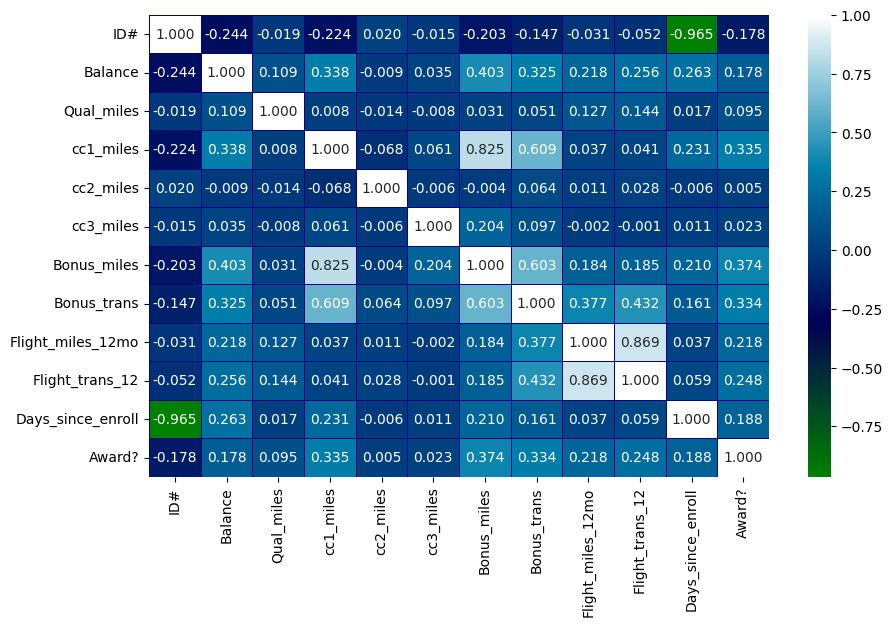

In [13]:
#heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True,cmap='ocean',fmt='.3f',linewidth=0.5,linecolor='darkblue')
plt.show()

# **Histogram**

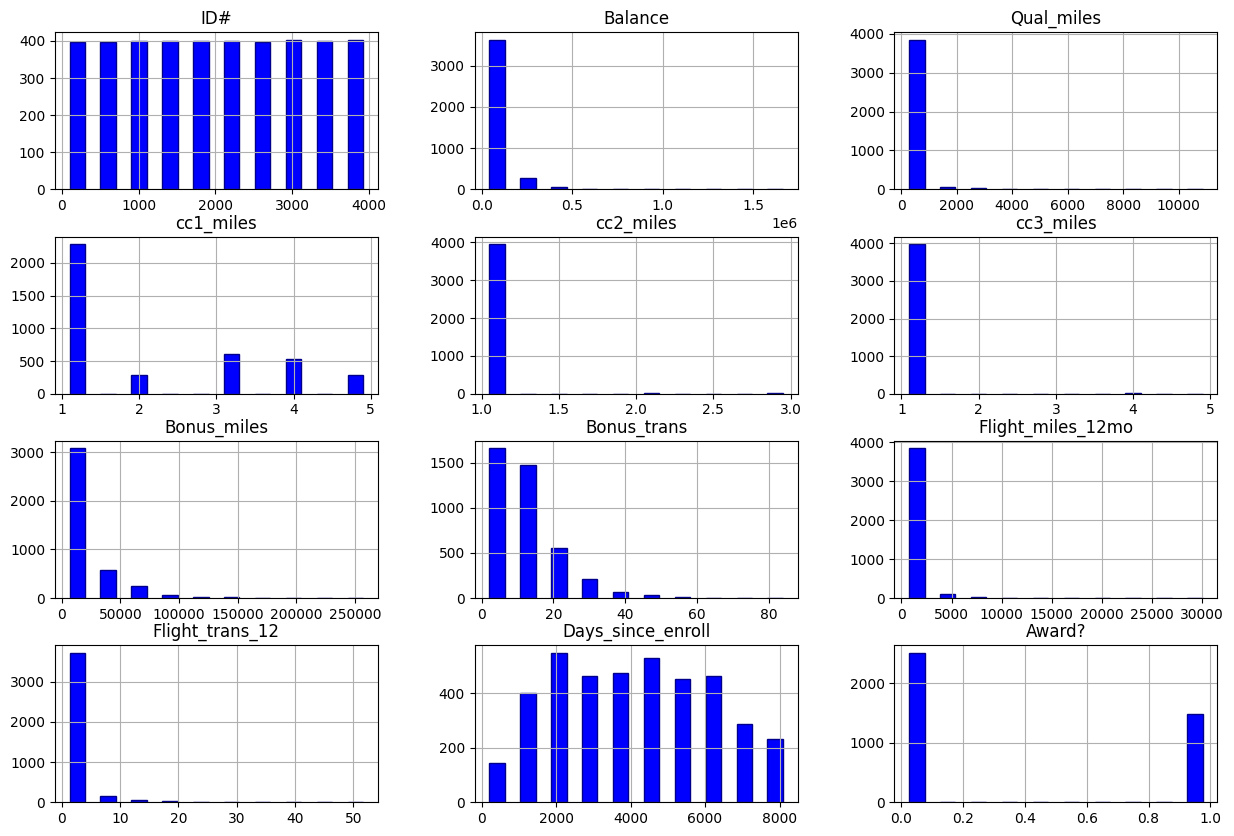

In [14]:
df.hist(color='blue',rwidth=0.5,figsize=(15,10),edgecolor='darkblue')
plt.show()

# **Hierachical Clustering**

In [15]:
hewa=pd.read_excel('/content/EastWestAirlines.xlsx',sheet_name='data')

In [16]:
hewa.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [17]:
hewa.drop('ID#',axis=1,inplace=True)

In [18]:
hewa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award?             3999 non-null   int64
dtypes: int64(11)
memory usage: 343.8 KB


**Normalization**

In [19]:
#we have to perform feature scaling i.e normalization

In [20]:
from sklearn.preprocessing import MinMaxScaler
ms=MinMaxScaler()

In [21]:
hewa.iloc[:,:]=ms.fit_transform(hewa.iloc[:,:])

In [22]:
hewa.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0


In [23]:
import scipy.cluster.hierarchy as sch

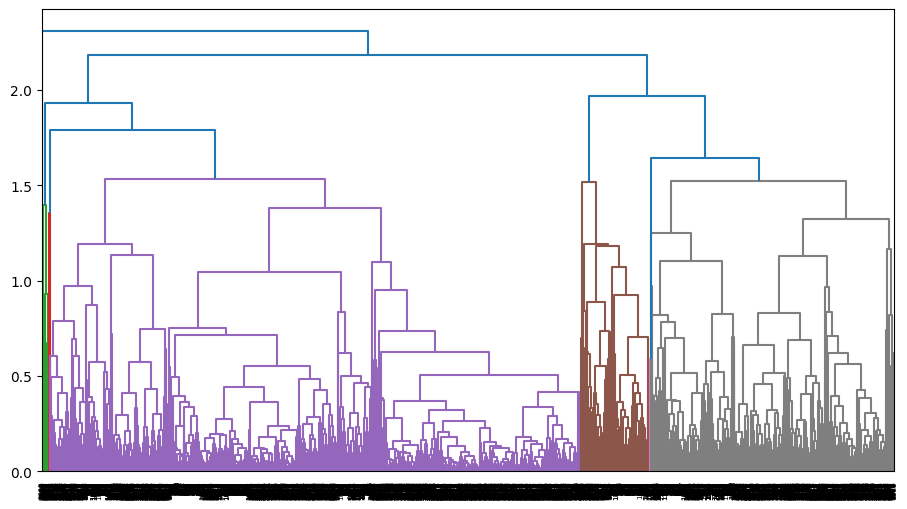

<Figure size 1000x700 with 0 Axes>

In [24]:
#dendrogram
plt.figure(figsize=(11,6))
sch.dendrogram(sch.linkage(hewa,method='complete'))
plt.figure(figsize=(10,7))
plt.show()

In [25]:
from sklearn.cluster import AgglomerativeClustering

In [26]:
#hierarchical clustering
ac=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='complete')
model=ac.fit(hewa)
pred=model.fit_predict(hewa)

In [27]:
pred

array([0, 0, 0, ..., 2, 0, 0])

In [28]:
np.unique(pred)

array([0, 1, 2, 3, 4])

In [29]:
hewa['cluster']=pred

In [30]:
hewa=hewa.sort_values('cluster')

In [31]:
hewa.columns

Index(['Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award?', 'cluster'],
      dtype='object')

In [32]:
hewa['cluster'].value_counts()

0    2495
2    1144
1     325
4      31
3       4
Name: cluster, dtype: int64

In [33]:
pred

array([0, 0, 0, ..., 2, 0, 0])

In [34]:
ac.labels_

array([0, 0, 0, ..., 2, 0, 0])

In [35]:
hewa.groupby(hewa['cluster']).agg(['mean'])

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
cluster,,,,,,,,,,,
0,0.035175,0.007973,0.178056,0.000200,0.002806,0.038954,0.105882,0.007392,0.012379,0.460983,0.000802
1,0.092140,0.018719,0.915385,0.000000,0.015385,0.267278,0.270340,0.033080,0.060319,0.695511,1.000000
2,0.047027,0.022296,0.276224,0.004808,0.000219,0.064027,0.155960,0.024011,0.042205,0.518734,1.000000
3,0.077426,0.031127,0.375000,0.000000,0.000000,0.248912,0.805233,0.647694,0.929245,0.265041,1.000000
4,0.026698,0.002894,0.000000,0.741935,0.000000,0.055441,0.187547,0.014383,0.037127,0.456023,0.193548


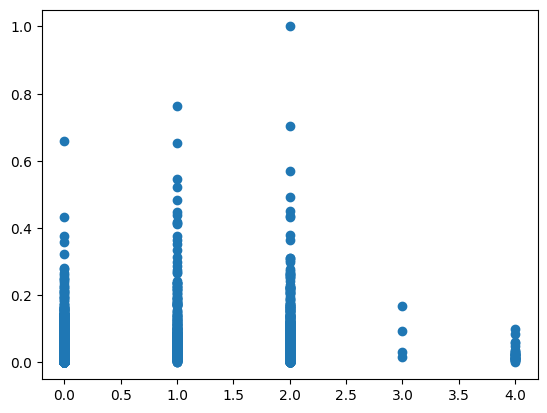

In [36]:
plt.scatter(hewa['cluster'],hewa['Balance'])

# **KMEAN Clustering**

In [37]:
kewa=pd.read_excel('EastWestAirlines.xlsx',sheet_name='data')

In [38]:
kewa.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [39]:
kewa.shape

(3999, 12)

In [40]:
#drop ID# and rename Award?

In [41]:
kewa.drop('ID#',axis=1,inplace=True)

In [42]:
kewa.rename(columns={'Award?':'Award'},inplace=True)

In [43]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [44]:
kewa.iloc[:,:]=sc.fit_transform(kewa.iloc[:,:])

In [45]:
kewa

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,-0.451141,-0.186299,-0.769578,-0.098242,-0.062767,-0.702786,-1.104065,-0.328603,-0.362168,1.395454,-0.766919
1,-0.539457,-0.186299,-0.769578,-0.098242,-0.062767,-0.701088,-0.999926,-0.328603,-0.362168,1.379957,-0.766919
2,-0.320031,-0.186299,-0.769578,-0.098242,-0.062767,-0.539253,-0.791649,-0.328603,-0.362168,1.411920,-0.766919
3,-0.583799,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,-0.328603,-0.362168,1.372208,-0.766919
4,0.239678,-0.186299,1.409471,-0.098242,-0.062767,1.083121,1.499394,1.154932,0.692490,1.363975,1.303918
...,...,...,...,...,...,...,...,...,...,...,...
3994,-0.547079,-0.186299,-0.769578,-0.098242,-0.062767,-0.356960,-0.791649,-0.185750,-0.098503,-1.315120,1.303918
3995,-0.091465,-0.186299,-0.769578,-0.098242,-0.062767,-0.669367,-0.687511,-0.328603,-0.362168,-1.318994,1.303918
3996,-0.000043,-0.186299,0.683121,-0.098242,-0.062767,0.343804,-0.375096,-0.328603,-0.362168,-1.315604,1.303918
3997,-0.185607,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,0.028531,-0.098503,-1.316088,-0.766919


In [46]:
#elbow graph

In [47]:
from sklearn.cluster import KMeans

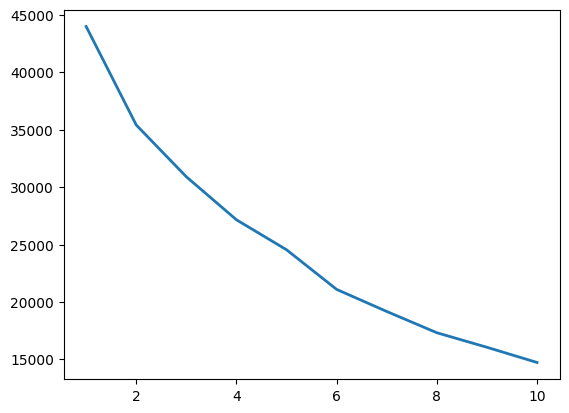

In [48]:
wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i)
  kmeans.fit(kewa)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss,linewidth=2)

In [49]:
#no of clusters somewhere around 4 or 5

In [50]:
kmeans=KMeans(n_clusters=4)
kmeans.fit(kewa)
pred=kmeans.fit_predict(kewa)

In [51]:
pred

array([1, 1, 1, ..., 2, 1, 1], dtype=int32)

In [52]:
kmeans.cluster_centers_

array([[ 1.19930860e+00,  1.02758112e+00,  1.04575116e-01,
         1.38046790e-01, -6.27665798e-02,  6.25951749e-01,
         1.56054548e+00,  3.42709017e+00,  3.68477621e+00,
         2.85274660e-01,  9.18646074e-01],
       [-2.98748917e-01, -6.42142013e-02, -6.14321497e-01,
         3.28947498e-02, -6.07426678e-02, -5.18324114e-01,
        -4.91372184e-01, -1.85214810e-01, -1.97781208e-01,
        -2.07878651e-01, -3.48824498e-01],
       [ 4.21746010e-01, -1.01103166e-02,  1.18776700e+00,
        -8.23786348e-02, -5.47688882e-02,  9.02825341e-01,
         7.41241194e-01, -9.45981390e-02, -1.04678145e-01,
         3.69614002e-01,  5.61908485e-01],
       [ 6.39719256e-01, -8.44329231e-02,  1.02208440e+00,
        -9.82418871e-02,  1.56462993e+01,  3.17969131e+00,
         1.71461374e+00,  3.32926913e-02,  5.96953922e-02,
         2.39872612e-01,  3.37527346e-01]])

In [53]:
kewa['clusterids']=pred

In [54]:
kewa['clusterids'].value_counts()

1    2532
2    1280
0     172
3      15
Name: clusterids, dtype: int64

In [55]:
kewa.groupby(kewa['clusterids']).mean().reset_index()

,clusterids,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,0,1.199309,1.027581,0.104575,0.138047,-0.062767,0.625952,1.560545,3.427090,3.684776,0.285275,0.918646
1,1,-0.298434,-0.064262,-0.613809,0.032843,-0.060743,-0.518002,-0.491079,-0.185271,-0.197846,-0.208106,-0.348990
2,2,0.421686,-0.009973,1.188161,-0.082366,-0.054763,0.903299,0.741625,-0.094415,-0.104477,0.370515,0.562947
3,3,0.639719,-0.084433,1.022084,-0.098242,15.646299,3.179691,1.714614,0.033293,0.059695,0.239873,0.337527


In [56]:
model0=kewa[pred==0]
model1=kewa[pred==1]
model2=kewa[pred==2]
model3=kewa[pred==3]

In [57]:
cols=kewa.columns
cols

Index(['Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award', 'clusterids'],
      dtype='object')

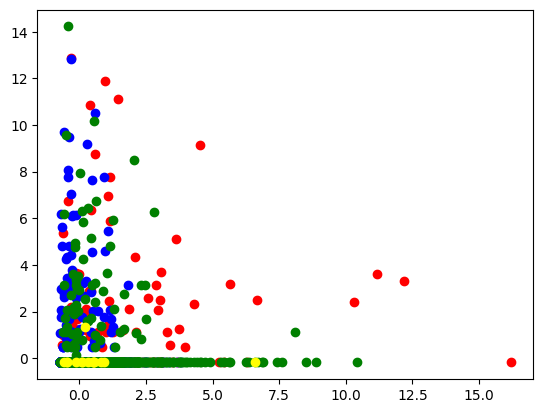

In [58]:
plt.scatter(model0[cols[0]],model0[cols[1]],color='red')
plt.scatter(model1[cols[0]],model1[cols[1]],color='blue')
plt.scatter(model2[cols[0]],model2[cols[1]],color='green')
plt.scatter(model3[cols[0]],model3[cols[1]],color='yellow')

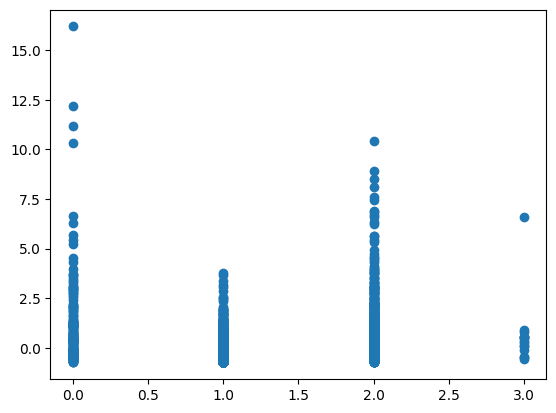

In [59]:
plt.scatter(kewa['clusterids'],kewa['Balance'])

In [60]:
#for 5 clusters

In [61]:
clu5=KMeans(n_clusters=5)
p1=clu5.fit_predict(kewa)
p1

array([0, 0, 0, ..., 2, 0, 0], dtype=int32)

In [62]:
clu5.cluster_centers_

array([[-2.97976937e-01, -6.25022794e-02, -6.11562406e-01,
        -9.82418871e-02, -6.07142876e-02, -5.22177324e-01,
        -5.02640464e-01, -1.85865491e-01, -1.98645151e-01,
        -2.09930086e-01, -3.52088077e-01,  1.00000000e+00],
       [ 1.18259166e+00,  1.04878830e+00,  1.16741274e-01,
        -9.82418871e-02, -6.27665798e-02,  6.28400983e-01,
         1.53410725e+00,  3.45256742e+00,  3.68382726e+00,
         2.88216336e-01,  9.09472929e-01,  1.55431223e-15],
       [ 4.20904857e-01, -9.55843446e-03,  1.19048531e+00,
        -9.82418871e-02, -5.47438367e-02,  9.04040309e-01,
         7.39681891e-01, -9.42639596e-02, -1.04491014e-01,
         3.72030549e-01,  5.62827542e-01,  2.00000000e+00],
       [-4.68896637e-02, -1.56235600e-01, -6.68227273e-01,
         9.03825361e+00, -6.27665798e-02, -1.01665326e-01,
         6.17851143e-01,  8.75493989e-02,  2.20346809e-01,
        -7.24639805e-02,  5.17838824e-02,  9.76744186e-01],
       [ 6.39719256e-01, -8.44329231e-02,  1.0220844

In [63]:
kewa_2=kewa.copy()

In [64]:
kewa_2['clusterids']=p1

In [65]:
kewa_2

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clusterids
0,-0.451141,-0.186299,-0.769578,-0.098242,-0.062767,-0.702786,-1.104065,-0.328603,-0.362168,1.395454,-0.766919,0
1,-0.539457,-0.186299,-0.769578,-0.098242,-0.062767,-0.701088,-0.999926,-0.328603,-0.362168,1.379957,-0.766919,0
2,-0.320031,-0.186299,-0.769578,-0.098242,-0.062767,-0.539253,-0.791649,-0.328603,-0.362168,1.411920,-0.766919,0
3,-0.583799,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,-0.328603,-0.362168,1.372208,-0.766919,0
4,0.239678,-0.186299,1.409471,-0.098242,-0.062767,1.083121,1.499394,1.154932,0.692490,1.363975,1.303918,2
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,-0.547079,-0.186299,-0.769578,-0.098242,-0.062767,-0.356960,-0.791649,-0.185750,-0.098503,-1.315120,1.303918,0
3995,-0.091465,-0.186299,-0.769578,-0.098242,-0.062767,-0.669367,-0.687511,-0.328603,-0.362168,-1.318994,1.303918,0
3996,-0.000043,-0.186299,0.683121,-0.098242,-0.062767,0.343804,-0.375096,-0.328603,-0.362168,-1.315604,1.303918,2
3997,-0.185607,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,0.028531,-0.098503,-1.316088,-0.766919,0


In [66]:
kewa_2['clusterids'].value_counts()

0    2496
2    1277
1     168
3      43
4      15
Name: clusterids, dtype: int64

In [67]:
model00=kewa_2[p1==0]
model11=kewa_2[p1==1]
model22=kewa_2[p1==2]
model33=kewa_2[p1==3]
model44=kewa_2[p1==4]

In [68]:
cols1=kewa_2.columns
cols1

Index(['Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award', 'clusterids'],
      dtype='object')

In [69]:
kewa_2[p1==0]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clusterids
0,-0.451141,-0.186299,-0.769578,-0.098242,-0.062767,-0.702786,-1.104065,-0.328603,-0.362168,1.395454,-0.766919,0
1,-0.539457,-0.186299,-0.769578,-0.098242,-0.062767,-0.701088,-0.999926,-0.328603,-0.362168,1.379957,-0.766919,0
2,-0.320031,-0.186299,-0.769578,-0.098242,-0.062767,-0.539253,-0.791649,-0.328603,-0.362168,1.411920,-0.766919,0
3,-0.583799,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,-0.328603,-0.362168,1.372208,-0.766919,0
5,-0.567483,-0.186299,-0.769578,-0.098242,-0.062767,-0.709992,-1.208203,-0.328603,-0.362168,1.367365,-0.766919,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3993,-0.691000,-0.186299,-0.769578,-0.098242,-0.062767,-0.694877,-0.895788,-0.328603,-0.362168,-1.318025,-0.766919,0
3994,-0.547079,-0.186299,-0.769578,-0.098242,-0.062767,-0.356960,-0.791649,-0.185750,-0.098503,-1.315120,1.303918,0
3995,-0.091465,-0.186299,-0.769578,-0.098242,-0.062767,-0.669367,-0.687511,-0.328603,-0.362168,-1.318994,1.303918,0
3997,-0.185607,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,0.028531,-0.098503,-1.316088,-0.766919,0


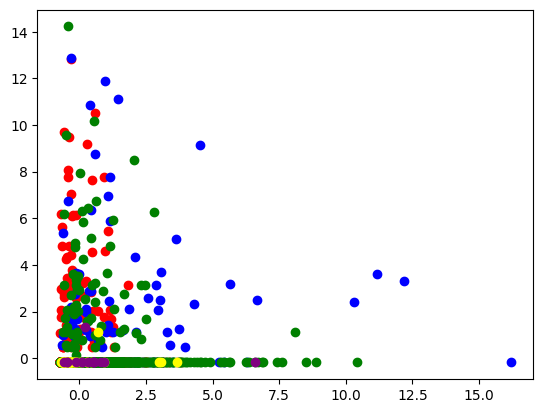

In [70]:
plt.scatter(model00[cols1[0]],model00[cols1[1]],color='red')
plt.scatter(model11[cols1[0]],model11[cols1[1]],color='blue')
plt.scatter(model22[cols1[0]],model22[cols1[1]],color='green')
plt.scatter(model33[cols1[0]],model33[cols1[1]],color='yellow')
plt.scatter(model44[cols1[0]],model44[cols1[1]],color='purple')

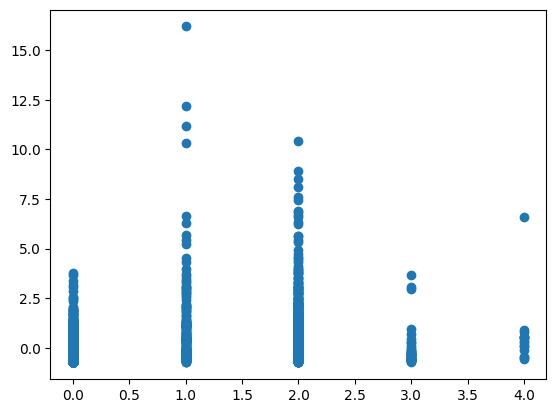

In [71]:
plt.scatter(kewa_2['clusterids'],kewa['Balance'])

In [72]:
#silhouette score
from sklearn.metrics import silhouette_score
silhouette_score(kewa_2.iloc[:,1:],pred)

0.39668085260141

# **DBSCAN**

In [73]:
dewa=pd.read_excel('EastWestAirlines.xlsx',sheet_name='data')

In [74]:
dewa.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [75]:
dewa.shape

(3999, 12)

In [76]:
dewa_copy=dewa.copy()

In [77]:
dewa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [78]:
dewa.drop('ID#',axis=1,inplace=True)

In [79]:
dewa.rename(columns={'Award?':'Award'},inplace=True)

In [80]:
dewa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award              3999 non-null   int64
dtypes: int64(11)
memory usage: 343.8 KB


In [81]:
#we have to perform feature scaling i.e Standarization or Normalization
#Standarization is use for standard the value i.e bring the value scale to 0,1,2,-1,-2.....
#Normalization is use for normalize the value i.e bringing the scale to 0,1,2......
#

In [82]:
from sklearn.preprocessing import MinMaxScaler
ms=MinMaxScaler()

In [83]:
dewa.iloc[:,:]=ms.fit_transform(dewa.iloc[:,:])

In [84]:
dewa

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0


In [85]:
from sklearn.neighbors import NearestNeighbors

In [86]:
nn=NearestNeighbors(n_neighbors=8)
nbrs=nn.fit(dewa)
distances,indices=nbrs.kneighbors(dewa)

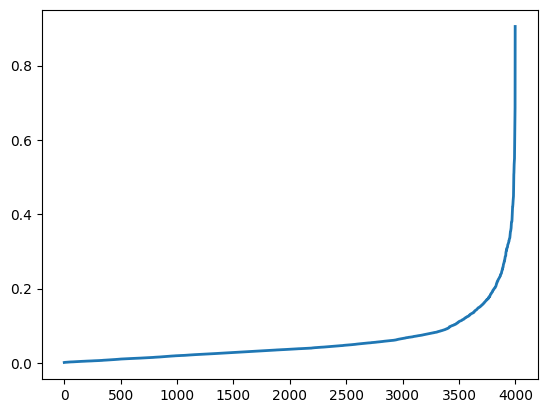

In [87]:
distances=np.sort(distances,axis=0)
distances=distances[:,2]
plt.plot(distances,linewidth=2)
plt.show()

In [88]:
#elbow graph

In [89]:
from sklearn.cluster import KMeans

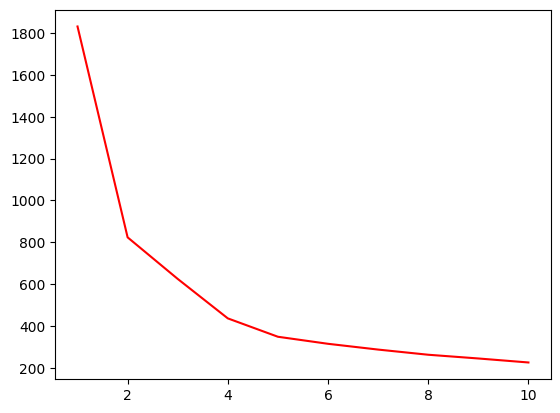

In [90]:
cwss1=[]
for i in range(1,11):
  kmeans1=KMeans(n_clusters=i)
  kmeans1.fit(dewa)
  cwss1.append(kmeans1.inertia_)
plt.plot(range(1,11),cwss1,color='red')

In [91]:
#from above graph we can say the cluster value is 4 or 5

In [92]:
#now dbscan

In [93]:
from sklearn.cluster import DBSCAN

In [94]:
dbscan=DBSCAN(eps=0.5,min_samples=7)
dbscan.fit_predict(dewa)

array([0, 0, 0, ..., 1, 0, 0])

In [95]:
dbscan.labels_

array([0, 0, 0, ..., 1, 0, 0])

In [96]:
np.unique(dbscan.labels_)

array([-1,  0,  1,  2,  3,  4])

**after try and error we had get 5 clusters/**

In [97]:
dewa['cluster']=dbscan.labels_

In [98]:
dewa

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,cluster
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0,0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0,0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0,0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0,0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0,1
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0,1
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0,1
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0,0


In [99]:
dewa[dewa['cluster']==-1]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,cluster
8,0.259850,0.000000,0.50,0.5,0.00,0.006648,0.500000,0.124931,0.226415,0.837473,1.0,-1
106,0.056678,0.106028,0.00,0.0,0.50,0.186052,0.302326,0.074634,0.169811,0.812153,1.0,-1
198,0.005085,0.000000,0.00,1.0,0.00,0.043222,0.186047,0.000000,0.000000,0.902339,1.0,-1
275,1.000000,0.000000,0.00,0.0,0.00,0.064880,0.372093,0.156505,0.433962,0.877864,1.0,-1
384,0.016537,0.000000,1.00,0.0,0.75,0.392347,0.372093,0.000000,0.000000,0.841331,1.0,-1
850,0.015033,0.000000,0.75,0.0,1.00,0.406955,0.418605,0.019470,0.037736,0.719074,1.0,-1
904,0.009288,0.000000,0.25,0.0,1.00,0.425398,0.186047,0.000000,0.000000,0.702074,1.0,-1
940,0.026292,0.000000,0.00,1.0,0.00,0.080046,0.220930,0.064899,0.075472,0.713046,1.0,-1
1036,0.090721,0.000000,0.75,0.0,0.50,0.280187,0.383721,0.000000,0.000000,0.695322,0.0,-1
1244,0.097643,0.000000,0.75,0.0,0.75,0.374375,0.348837,0.000000,0.000000,0.666626,0.0,-1


In [100]:
len(dewa[dewa['cluster']==-1])

28

In [101]:
dewa.groupby(dewa['cluster']).agg(['mean'])

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
cluster,,,,,,,,,,,
-1,0.104957,0.011437,0.392857,0.25,0.392857,0.276889,0.381645,0.123685,0.205526,0.523257,0.75
0,0.034948,0.007959,0.177293,0.00,0.000402,0.038126,0.105297,0.007352,0.012295,0.460741,0.00
1,0.056257,0.021786,0.418793,0.00,0.000172,0.107545,0.179816,0.025928,0.045947,0.557789,1.00
2,0.023004,0.000000,0.000000,0.50,0.000000,0.034849,0.156977,0.006794,0.015330,0.423100,0.00
3,0.029971,0.000000,0.000000,1.00,0.000000,0.059016,0.166667,0.001442,0.004193,0.434223,0.00
4,0.061473,0.000000,0.025000,0.50,0.000000,0.045251,0.229070,0.024217,0.041509,0.529829,1.00


In [102]:
label0=dewa[dbscan.labels_==0]
label1=dewa[dbscan.labels_==1]
label2=dewa[dbscan.labels_==2]
label3=dewa[dbscan.labels_==3]
label4=dewa[dbscan.labels_==4]
labelnoisy=dewa[dbscan.labels_==-1]

In [103]:
cols=dewa.columns
cols

Index(['Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award', 'cluster'],
      dtype='object')

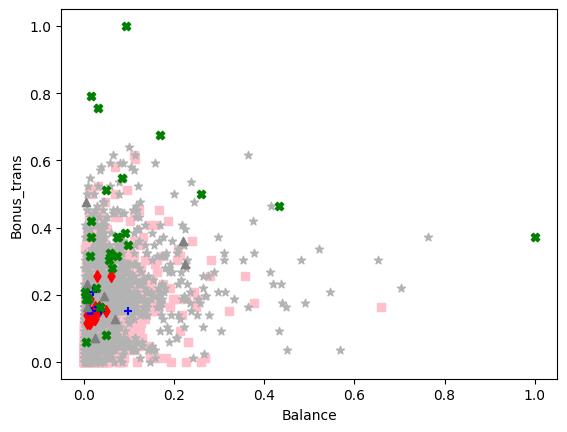

In [104]:
plt.scatter(label0[cols[0]],label0[cols[6]],c='pink',marker='s')
plt.scatter(label1[cols[0]],label1[cols[6]],c='.7',marker='*')
plt.scatter(label2[cols[0]],label2[cols[6]],c='red',marker='d')
plt.scatter(label3[cols[0]],label3[cols[6]],c='blue',marker='+')
plt.scatter(label4[cols[0]],label4[cols[6]],c='.5',marker='^')
plt.scatter(labelnoisy[cols[0]],labelnoisy[cols[6]],c='green',marker='X')
plt.xlabel('Balance')
plt.ylabel('Bonus_trans')
plt.show()

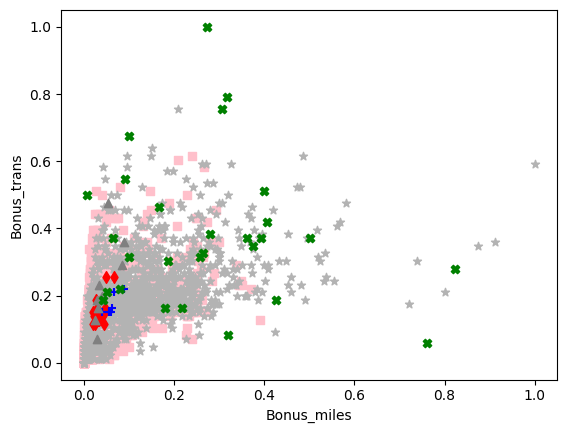

In [105]:
plt.scatter(label0[cols[5]],label0[cols[6]],c='pink',marker='s')
plt.scatter(label1[cols[5]],label1[cols[6]],c='.7',marker='*')
plt.scatter(label2[cols[5]],label2[cols[6]],c='red',marker='d')
plt.scatter(label3[cols[5]],label3[cols[6]],c='blue',marker='+')
plt.scatter(label4[cols[5]],label4[cols[6]],c='.5',marker='^')
plt.scatter(labelnoisy[cols[5]],labelnoisy[cols[6]],c='green',marker='X')
plt.xlabel('Bonus_miles')
plt.ylabel('Bonus_trans')
plt.show()

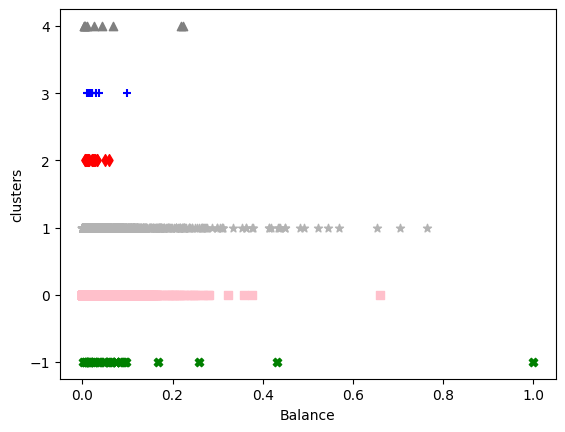

In [106]:
plt.scatter(label0[cols[0]],label0[cols[11]],c='pink',marker='s')
plt.scatter(label1[cols[0]],label1[cols[11]],c='.7',marker='*')
plt.scatter(label2[cols[0]],label2[cols[11]],c='red',marker='d')
plt.scatter(label3[cols[0]],label3[cols[11]],c='blue',marker='+')
plt.scatter(label4[cols[0]],label4[cols[11]],c='.5',marker='^')
plt.scatter(labelnoisy[cols[0]],labelnoisy[cols[11]],c='green',marker='X')
plt.xlabel('Balance')
plt.ylabel('clusters')
plt.show()

above graph represent clusters formation


<Axes: xlabel='cluster', ylabel='Count'>

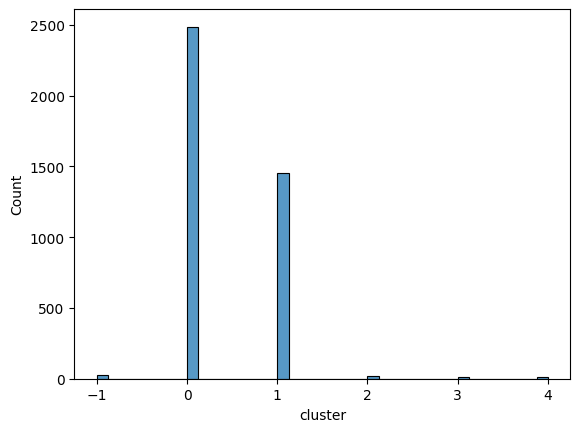

In [107]:
sns.histplot(dewa['cluster'])

In [108]:
#silhouette score
from sklearn.metrics import silhouette_score
silhouette_score(dewa,dbscan.labels_)

0.6464633612783395

In [109]:
#completed

# **Completed**